In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
df = pd.read_csv('Social_Network_Ads.csv')

In [49]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [51]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [52]:
df.shape

(400, 5)

In [53]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)

(0, 5)


In [54]:
df.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [55]:
df = df.drop_duplicates()
df.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [56]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


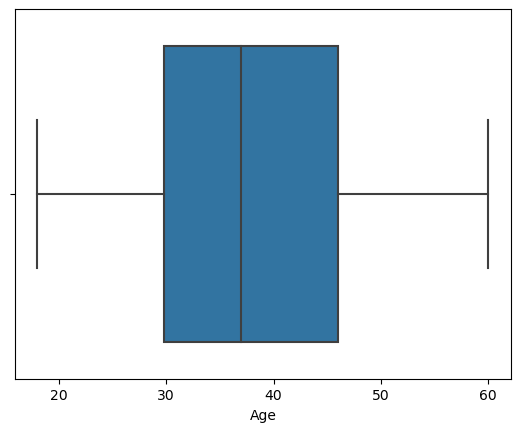

In [57]:
sns.boxplot(x = df['Age'])
plt.show()

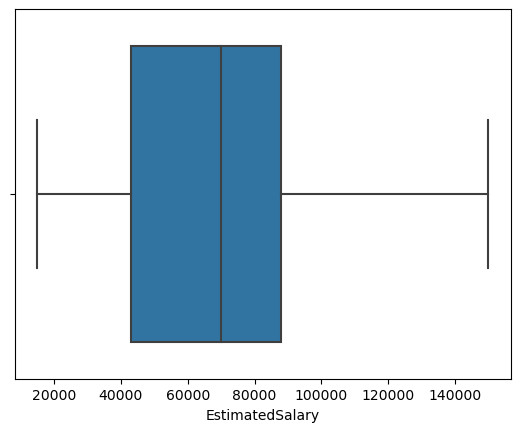

In [58]:
sns.boxplot(x = df['EstimatedSalary'])
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['categorical_column_encoded'] = label_encoder.fit_transform(df['Gender'])

In [60]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,categorical_column_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [61]:
df = df.drop(['Gender'], axis=1) 

In [62]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,categorical_column_encoded
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [63]:
columns = df.columns.tolist()
index1 = columns.index('Purchased')
index2 = columns.index('categorical_column_encoded')
columns[index1], columns[index2] = columns[index2], columns[index1]
df = df[columns]

In [64]:
df.head()

,User ID,Age,EstimatedSalary,categorical_column_encoded,Purchased
0,15624510,19,19000,1,0
1,15810944,35,20000,1,0
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,1,0


In [65]:
df = df.rename(columns={"categorical_column_encoded": "Gender"})

In [66]:
df.head()

,User ID,Age,EstimatedSalary,Gender,Purchased
0,15624510,19,19000,1,0
1,15810944,35,20000,1,0
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,1,0


In [67]:
x = df.iloc[:,:-1].values
y = df.iloc[:,4].values

In [68]:
print(x)

[[15624510       19    19000        1]
 [15810944       35    20000        1]
 [15668575       26    43000        0]
 ...
 [15654296       50    20000        0]
 [15755018       36    33000        1]
 [15594041       49    36000        0]]


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [71]:
y_pred = logreg.predict(x_test)

In [74]:
print(y_test)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1]


In [75]:
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 0 0 0]


In [78]:
print("Train score: ",logreg.score(x_train,y_train))

Train score:  0.7875


In [79]:
print("Test score: ",logreg.score(x_test,y_test))

Test score:  0.7375


In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7375


In [73]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[49  3]
 [18 10]]


The basic algorithm provided earlier for logistic regression is applicable for binary classification problems, where you have two classes to predict. However, logistic regression can also be extended for multi-class classification problems, where you have more than two classes to predict. The modification needed in the algorithm is to use the appropriate "multi_class" parameter in the LogisticRegression model.

For binary classification (two classes), the default setting "multi_class='ovr'" (one-vs-rest) is appropriate. For multi-class classification (more than two classes), you need to set "multi_class='multinomial'" and also specify the solver to handle the optimization problem. The "solver" parameter is required when "multi_class" is set to "multinomial". Common solvers include "lbfgs", "newton-cg", "sag", and "saga".

Here's the modified algorithm for logistic regression that can handle both binary and multi-class classification problems:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # or 'newton-cg', 'sag', 'saga'
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
